In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
pr = pd.read_csv('output/pagerank_result/pagerank_result.csv')
lp = pd.read_csv('output/labelprop_result/labelprop_result.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506912 entries, 0 to 1506911
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   src     1506912 non-null  int64  
 1   rank    1506912 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 23.0 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432693 entries, 0 to 1432692
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1432693 non-null  int64  
 1   max_count  1432693 non-null  int64  
 2   label      1327135 non-null  float64
 3   count      1432693 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 43.7 MB


In [10]:
print(pr.head())
print(lp.head())


print("Number of nodes in PageRank:", len(pr))
print("Number of nodes in Label Propagation:", len(lp))

      src      rank
0    1238  1.395651
1     148  2.889716
2   19204  3.322353
3  219558  2.181839
4    8389  1.705604
   id  max_count     label  count
0  28          4  237039.0      4
1  31          5       NaN      3
2  34          5  240828.0      3
3  53          2       NaN      2
4  65          1       NaN      1
Number of nodes in PageRank: 1506912
Number of nodes in Label Propagation: 1432693


Top 10 Nodes by PageRank:
           src        rank
1233531   5935  458.528904
28707     5867  220.144887
1374995   1891  204.142015
1133235   6228  124.151677
619044    8413  104.641983
1254023  57918   67.450603
1205142   1830   66.805168
1383159  25994   60.065306
382015   27509   58.844867
132895   38212   45.858352


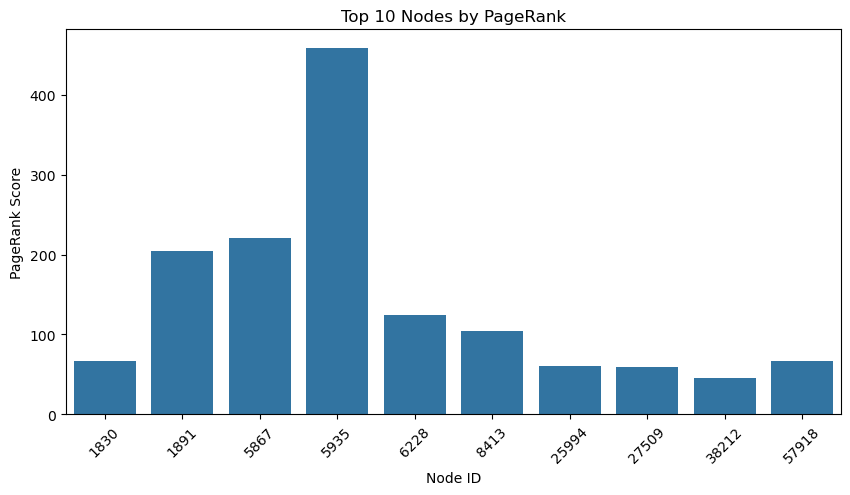

In [14]:
top_pr = pr.sort_values(by='rank', ascending=False).head(10)
print("Top 10 Nodes by PageRank:")
print(top_pr)

plt.figure(figsize=(10,5))
sns.barplot(x='src', y='rank', data=top_pr)
plt.title("Top 10 Nodes by PageRank")
plt.xlabel("Node ID")
plt.ylabel("PageRank Score")
plt.xticks(rotation=45)
plt.show()

Top 10 Most Frequent Labels:
label
9714.0      1178
493148.0    1081
760717.0     825
5867.0       821
89882.0      386
414487.0     323
53592.0      250
541230.0     250
5935.0       235
965528.0     215
Name: count, dtype: int64


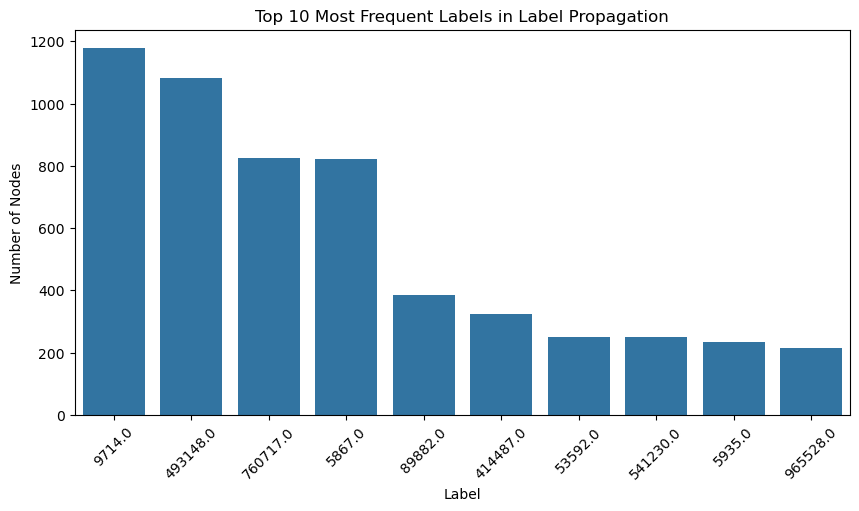

In [15]:
label_counts = lp['label'].value_counts().head(10)
print("Top 10 Most Frequent Labels:")
print(label_counts)

plt.figure(figsize=(10,5))
sns.barplot(x=label_counts.index.astype(str), y=label_counts.values)
plt.title("Top 10 Most Frequent Labels in Label Propagation")
plt.xlabel("Label")
plt.ylabel("Number of Nodes")
plt.xticks(rotation=45)
plt.show()


In [ ]:
merged = pr.merge(lp, left_on='src', right_on='id')
merged = merged.drop(columns=['id'])  # optional cleanup

# Correlation between PageRank and Label groups
plt.figure(figsize=(12,6))
sns.boxplot(x='label', y='rank', data=merged)
plt.title("Distribution of PageRank Scores per Label")
plt.xlabel("Label (Community)")
plt.ylabel("PageRank Score")
plt.yscale("log")  # if necessary
plt.xticks(rotation=90)
plt.show()
